In [0]:
from google.colab import files 
from tensorflow.keras import utils
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from tensorflow.keras.optimizers import Adam, RMSprop 
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, MaxPooling1D, Embedding, Activation
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile
z = zipfile.ZipFile("/content/drive/My Drive/Music/genres.zip")
z.extractall()

In [0]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

In [0]:
def get_features(y, sr):
  chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
  rmse = np.mean(librosa.feature.rmse(y=y))
  spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
  spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
  rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
  zcr = np.mean(librosa.feature.zero_crossing_rate(y=y))
  mfcc = librosa.feature.mfcc(y=y, sr=sr)

  out = []
  out.append(rmse)
  out.append(spec_cent)
  out.append(spec_bw)
  out.append(rolloff)
  out.append(zcr)

  for e in mfcc:
    out.append(np.mean(e))

  for e in chroma_stft:
    out.append(np.mean(e))

  return out


In [0]:
!ls

drive  genres  sample_data


In [0]:
import time
x_train = []
y_train = []
curr_time = time.time()

for i in range(len(genres)):
  g = genres[i]
  for filename in os.listdir(f"./genres/{g}"):
    songname = f"./genres/{g}/{filename}"
    y, sr = librosa.load(songname, mono=True, duration=50)
    out = get_features(y, sr)
    x_train.append(out)
    y_train.append(utils.to_categorical(i, len(genres)))
  
  print("Жанр ", g, " готов -> ", round(time.time() - curr_time), "c", sep="")
  curr_time = time.time()

x_train = np.array(x_train)
y_train = np.array(y_train)


Жанр blues готов -> 92c
Жанр classical готов -> 89c
Жанр country готов -> 88c
Жанр disco готов -> 87c
Жанр hiphop готов -> 89c
Жанр jazz готов -> 89c
Жанр metal готов -> 88c
Жанр pop готов -> 88c
Жанр reggae готов -> 88c
Жанр rock готов -> 89c


In [0]:
x_train_backup = x_train.copy()
y_train_backup = y_train.copy()

In [0]:
y_train_class = np.argmax(y_train, axis=1)
print(y_train_class)
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [0]:
print(x_train.shape)
print(y_train.shape)
print(y_train_class.shape)

(1000, 37)
(1000, 10)
(1000,)


In [0]:
scaler = StandardScaler()

x_train = scaler.fit_transform(np.array(x_train, dtype = float))

In [0]:
from sklearn.model_selection import train_test_split
x_train = x_train_backup.copy()
y_train = y_train_backup.copy()
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train_class, test_size=0.1)

Epoch 1/200
45/45 [==============================] - 0s 8ms/step - loss: 47.7104 - accuracy: 0.1178 - val_loss: 12.6926 - val_accuracy: 0.0900
Epoch 2/200
45/45 [==============================] - 0s 3ms/step - loss: 14.2548 - accuracy: 0.1022 - val_loss: 7.8196 - val_accuracy: 0.1800
Epoch 3/200
45/45 [==============================] - 0s 3ms/step - loss: 11.4649 - accuracy: 0.1456 - val_loss: 10.1674 - val_accuracy: 0.2400
Epoch 4/200
45/45 [==============================] - 0s 3ms/step - loss: 9.8140 - accuracy: 0.1611 - val_loss: 10.3020 - val_accuracy: 0.1700
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 8.4095 - accuracy: 0.1878 - val_loss: 7.3157 - val_accuracy: 0.1200
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 7.1177 - accuracy: 0.1589 - val_loss: 2.9070 - val_accuracy: 0.0900
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 2.8719 - accuracy: 0.1422 - val_loss: 2.6858 - val_accuracy: 0.0900
Epoch 8

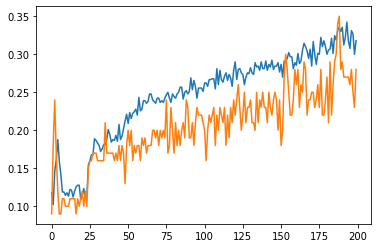

In [0]:
indexes = range(0,37)
model = Sequential()
model.add(Dense(256, activation='elu', input_shape=(len(indexes),)))
model.add(Dense(128, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train[:, indexes],
                    y_train,
                    epochs=200,
                    batch_size=20,
                    validation_data=(x_test[:, indexes], y_test))

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()


In [0]:
def create_net(denses, input_len):
  inner_model = Sequential()
  inner_model.add(Dense(256, activation='elu', input_shape=(input_len,)))

  for d in denses:
    inner_model.add(d)

  inner_model.add(Dense(10, activation='softmax'))
  return inner_model
  

In [0]:
indexes = range(0,37)
models = [
          create_net([Dense(10, activation="elu")], len(indexes)),
          create_net([Dense(2000, activation="elu"), Dense(1000, activation="elu"), Dense(500, activation="elu"), Dense(250, activation="elu"), Dense(125, activation="elu"), Dense(64, activation="elu")], len(indexes)),
          create_net([Dense(1000, activation="elu"), Dense(500, activation="elu"), Dense(300, activation="elu"), Dense(700, activation="elu"), Dense(1000, activation="elu"), Dense(500, activation="elu")], len(indexes)),
          create_net([Dense(1000, activation="relu"), Dense(500, activation="relu"), Dense(300, activation="relu")], len(indexes)),
          create_net([Dense(1000, activation="linear"), Dense(500, activation="linear"), Dense(300, activation="linear")], len(indexes)),
          create_net([Dense(1000, activation="relu"), Dropout(0.5), Dense(500, activation="relu"), Dropout(0.5),  Dense(300, activation="relu")], len(indexes)),
          create_net([BatchNormalization(), Dense(1000, activation="relu"), Dropout(0.5), Dense(500, activation="relu"), Dropout(0.5),  Dense(300, activation="relu")], len(indexes)),
]
batches = [10, 128, 1204]

In [0]:
models

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               9728      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 12,408
Trainable params: 12,408
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
45/45 [==============================] - 0s 4ms/step - loss: 187.8871 - accuracy: 0.0844 - val_loss: 101.2950 - val_accuracy: 0.0700
Epoch 2/1000
45/45 [==============================] - 0s 2ms/step - loss: 45.3991 - accuracy: 0.1178 - val_loss: 12.9554 - val_accuracy: 0.1700
Epoch 3/1000
45/45 [==============================] - 0s 2ms/step - loss: 4.5238 - accurac

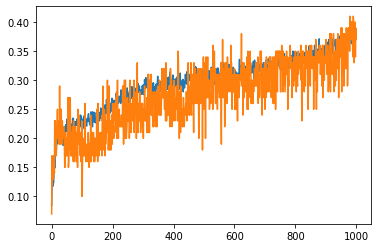

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               9728      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 12,408
Trainable params: 12,408
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
45/45 [==============================] - 0s 4ms/step - loss: 1.6164 - accuracy: 0.3800 - val_loss: 1.8119 - val_accuracy: 0.3200
Epoch 2/1000
45/45 [==============================] - 0s 6ms/step - loss: 1.5914 - accuracy: 0.3844 - val_loss: 1.8849 - val_accuracy: 0.3500
Epoch 3/1000
45/45 [==============================] - 0s 3ms/step - loss: 1.5950 - accuracy: 0.3

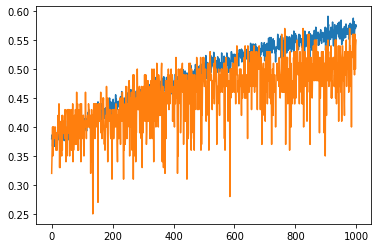

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               9728      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 12,408
Trainable params: 12,408
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
45/45 [==============================] - 0s 4ms/step - loss: 1.2344 - accuracy: 0.5600 - val_loss: 1.8644 - val_accuracy: 0.4600
Epoch 2/1000
45/45 [==============================] - 0s 3ms/step - loss: 1.2158 - accuracy: 0.5700 - val_loss: 1.5159 - val_accuracy: 0.5100
Epoch 3/1000
45/45 [==============================] - 0s 3ms/step - loss: 1.1721 - accuracy: 0.5

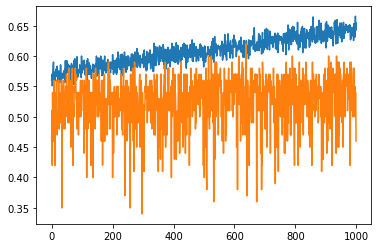

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               9728      
_________________________________________________________________
dense_8 (Dense)              (None, 2000)              514000    
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_10 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_11 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_12 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

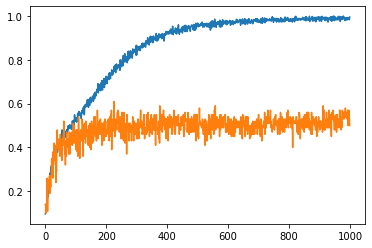

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               9728      
_________________________________________________________________
dense_8 (Dense)              (None, 2000)              514000    
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_10 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_11 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_12 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

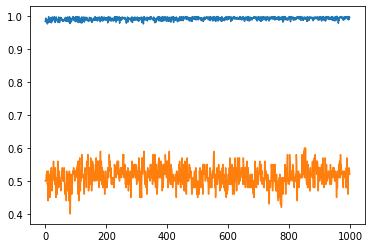

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               9728      
_________________________________________________________________
dense_8 (Dense)              (None, 2000)              514000    
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_10 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_11 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_12 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

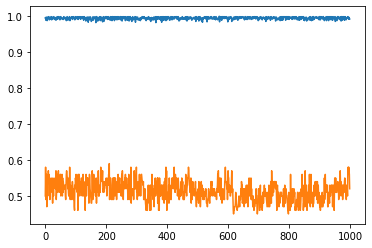

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               9728      
_________________________________________________________________
dense_16 (Dense)             (None, 1000)              257000    
_________________________________________________________________
dense_17 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_18 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_19 (Dense)             (None, 700)               210700    
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              701000    
_________________________________________________________________
dense_21 (Dense)             (None, 500)              

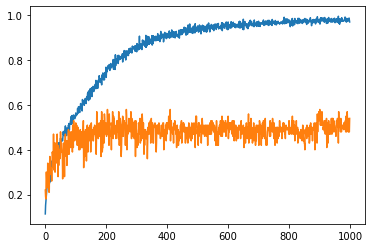

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               9728      
_________________________________________________________________
dense_16 (Dense)             (None, 1000)              257000    
_________________________________________________________________
dense_17 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_18 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_19 (Dense)             (None, 700)               210700    
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              701000    
_________________________________________________________________
dense_21 (Dense)             (None, 500)              

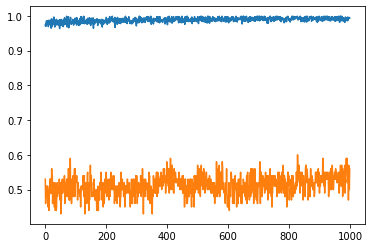

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               9728      
_________________________________________________________________
dense_16 (Dense)             (None, 1000)              257000    
_________________________________________________________________
dense_17 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_18 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_19 (Dense)             (None, 700)               210700    
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              701000    
_________________________________________________________________
dense_21 (Dense)             (None, 500)              

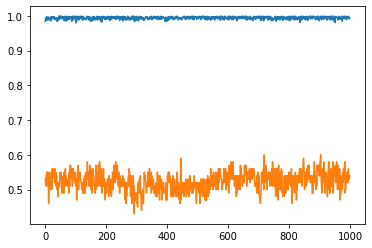

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               9728      
_________________________________________________________________
dense_24 (Dense)             (None, 1000)              257000    
_________________________________________________________________
dense_25 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_26 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                3010      
Total params: 920,538
Trainable params: 920,538
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
45/45 [==============================] - 0s 10ms/step - loss: 73.0107 - accuracy: 0.1333 - val_loss: 

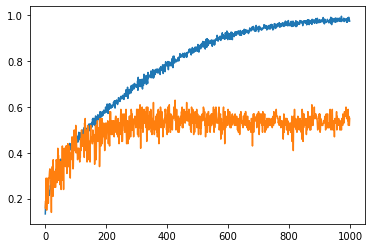

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               9728      
_________________________________________________________________
dense_24 (Dense)             (None, 1000)              257000    
_________________________________________________________________
dense_25 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_26 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                3010      
Total params: 920,538
Trainable params: 920,538
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.1349 - accuracy: 0.9667 - val_loss: 9.

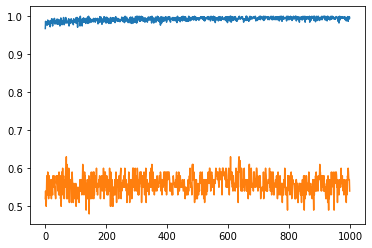

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               9728      
_________________________________________________________________
dense_24 (Dense)             (None, 1000)              257000    
_________________________________________________________________
dense_25 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_26 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                3010      
Total params: 920,538
Trainable params: 920,538
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.0879 - accuracy: 0.9844 - val_loss: 16

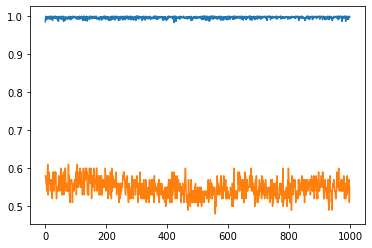

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 256)               9728      
_________________________________________________________________
dense_29 (Dense)             (None, 1000)              257000    
_________________________________________________________________
dense_30 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_31 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                3010      
Total params: 920,538
Trainable params: 920,538
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
45/45 [==============================] - 0s 4ms/step - loss: 488.1416 - accuracy: 0.1178 - val_loss: 

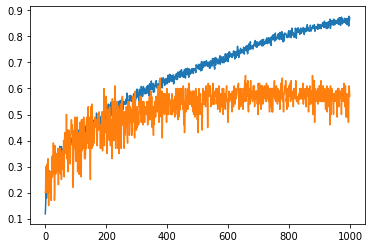

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 256)               9728      
_________________________________________________________________
dense_29 (Dense)             (None, 1000)              257000    
_________________________________________________________________
dense_30 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_31 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                3010      
Total params: 920,538
Trainable params: 920,538
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.5022 - accuracy: 0.8400 - val_loss: 2.

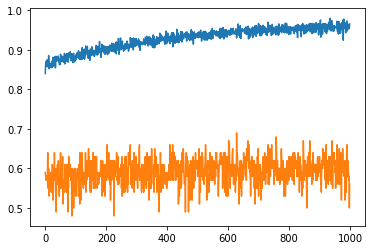

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 256)               9728      
_________________________________________________________________
dense_29 (Dense)             (None, 1000)              257000    
_________________________________________________________________
dense_30 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_31 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                3010      
Total params: 920,538
Trainable params: 920,538
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.3111 - accuracy: 0.9356 - val_loss: 4.

In [0]:
indexes = range(0,37)
for m in models:
  for b in batches:
    m.summary()
    m.compile(optimizer=RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    history = m.fit(x_train[:, indexes],
                    y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data=(x_test[:, indexes], y_test))

    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.show()
